# Problem 2: System Power Prediction

## Question 1

In [2]:
import pandas as pd
import numpy as np

# Read the train data
train = pd.read_csv(r'training_dataset.csv')
target = np.where(train['w_big'] > 1, 1, 0)
train = train.drop("w_big", axis= 'columns')

# Read the test data
blackscholes = pd.read_csv(r'testing_blackscholes.csv')
blackscholes_target = np.where(blackscholes['w_big'] > 1, 1, 0)
blackscholes = blackscholes.drop("w_big", axis= 'columns')

bodytrack = pd.read_csv(r'testing_bodytrack.csv')
bodytrack_target = np.where(bodytrack['w_big'] > 1, 1, 0)
bodytrack = bodytrack.drop("w_big", axis= 'columns')

In [3]:
#recommended data transforms
for i in range(4, 8):
    train[f'temp{i}'] = train[f'temp{i}'] / 100
    blackscholes[f'temp{i}'] = blackscholes[f'temp{i}'] / 100
    bodytrack[f'temp{i}'] = bodytrack[f'temp{i}'] / 100

train['temp_gpu'] = train['temp_gpu'] / 100
blackscholes['temp_gpu'] = blackscholes['temp_gpu'] / 100
bodytrack['temp_gpu'] = bodytrack['temp_gpu'] / 100

train['freq_big_cluster'] = train['freq_big_cluster'] / 1000000
blackscholes['freq_big_cluster'] = blackscholes['freq_big_cluster'] / 1000000
bodytrack['freq_big_cluster'] = bodytrack['freq_big_cluster'] / 1000000


In [4]:
import sklearn.svm as svm
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

clf = svm.SVC(kernel='linear') 
clf.fit(train, target)

SVC(kernel='linear')

BlackScholes
Accuracy:  0.999395039322444
Precision:  1.0
Recall:  0.9990892531876139
F1:  0.9995444191343964


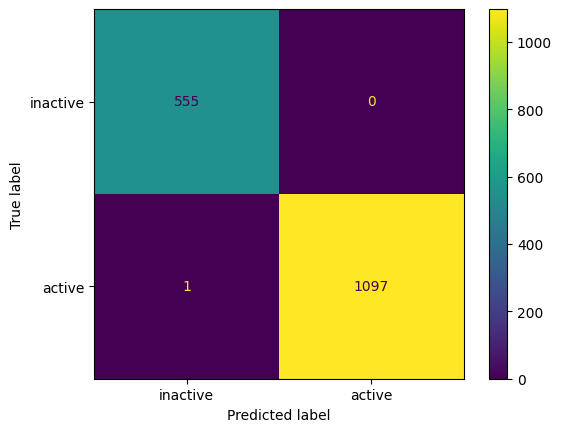

BodyTrack
Accuracy:  0.9993122420907841
Precision:  0.9988998899889989
Recall:  1.0
F1:  0.9994496422674739


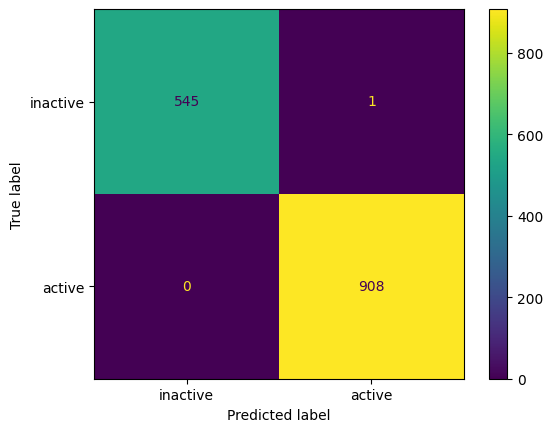

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

bspreds = clf.predict(blackscholes)
btpreds = clf.predict(bodytrack)

bscm = confusion_matrix(blackscholes_target, bspreds)
btc = confusion_matrix(bodytrack_target, btpreds)

print("BlackScholes")
print("Accuracy: ", accuracy_score(blackscholes_target, bspreds))
print("Precision: ", precision_score(blackscholes_target, bspreds))
print("Recall: ", recall_score(blackscholes_target, bspreds))
print("F1: ", f1_score(blackscholes_target, bspreds))
disp = ConfusionMatrixDisplay(confusion_matrix=bscm, display_labels=["inactive", "active"])
disp.plot()
plt.show()

print("BodyTrack")
print("Accuracy: ", accuracy_score(bodytrack_target, btpreds))
print("Precision: ", precision_score(bodytrack_target, btpreds))
print("Recall: ", recall_score(bodytrack_target, btpreds))
print("F1: ", f1_score(bodytrack_target, btpreds))
disp = ConfusionMatrixDisplay(confusion_matrix=btc, display_labels=["inactive", "active"])
disp.plot()
plt.show()

## Question 2

In [6]:
from sklearn.linear_model import LinearRegression
train = pd.read_csv(r'training_dataset.csv').iloc[:,5: 15]
target = pd.read_csv(r'training_dataset.csv')['w_big']

blackscholes = pd.read_csv(r'testing_blackscholes.csv').iloc[:,5: 15]
blackscholes_target = pd.read_csv(r'testing_blackscholes.csv')['w_big']

bodytrack = pd.read_csv(r'testing_bodytrack.csv').iloc[:,5: 15]
bodytrack_target = pd.read_csv(r'testing_bodytrack.csv')['w_big']

In [7]:
#recommended data transforms
for i in range(4, 8):
    train[f'temp{i}'] = train[f'temp{i}'] / 100
    blackscholes[f'temp{i}'] = blackscholes[f'temp{i}'] / 100
    bodytrack[f'temp{i}'] = bodytrack[f'temp{i}'] / 100

train['temp_gpu'] = train['temp_gpu'] / 100
blackscholes['temp_gpu'] = blackscholes['temp_gpu'] / 100
bodytrack['temp_gpu'] = bodytrack['temp_gpu'] / 100

train['freq_big_cluster'] = train['freq_big_cluster'] / 1000000
blackscholes['freq_big_cluster'] = blackscholes['freq_big_cluster'] / 1000000
bodytrack['freq_big_cluster'] = bodytrack['freq_big_cluster'] / 1000000

In [8]:
linmod = LinearRegression().fit(train, target)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

print("Training")
print("R2: ", r2_score(target, linmod.predict(train)))
print("MSE: ", mean_squared_error(target, linmod.predict(train)))

print("BlackScholes")
print("R2: ", r2_score(blackscholes_target, linmod.predict(blackscholes)))
print("MSE: ", mean_squared_error(blackscholes_target, linmod.predict(blackscholes)))

print("BodyTrack")
print("R2: ", r2_score(bodytrack_target, linmod.predict(bodytrack)))
print("MSE: ", mean_squared_error(bodytrack_target, linmod.predict(bodytrack)))


Training
R2:  0.9869761626648631
MSE:  0.010151781665943523
BlackScholes
R2:  0.9566269821838993
MSE:  0.05941814533626503
BodyTrack
R2:  0.9224313620150326
MSE:  0.12156466064083367


## Question 3

In [10]:
def calc(freq):
    if(freq == 900.0):
        return 0.975
    elif(freq == 1000.0):
        return 1.0
    elif(freq == 1500.0):
        return 1.1375
    elif(freq == 2000.0):
        return 1.362

train['dynamic_power'] = [i*i*calc(i) for i in train['freq_big_cluster']] 
blackscholes['dynamic_power'] = [i*i*calc(i) for i in blackscholes['freq_big_cluster']]
bodytrack['dynamic_power'] = [i*i*calc(i) for i in bodytrack['freq_big_cluster']]

In [26]:
# linmod = LinearRegression().fit(train, target)
linmod = make_pipeline(preprocessing.RobustScaler(), LinearRegression()).fit(train, target)

print("Training")
print("R2: ", r2_score(target, linmod.predict(train)))
print("MSE: ", mean_squared_error(target, linmod.predict(train)))

print("BlackScholes")
print("R2: ", r2_score(blackscholes_target, linmod.predict(blackscholes)))
print("MSE: ", mean_squared_error(blackscholes_target, linmod.predict(blackscholes)))

print("BodyTrack")
print("R2: ", r2_score(bodytrack_target, linmod.predict(bodytrack)))
print("MSE: ", mean_squared_error(bodytrack_target, linmod.predict(bodytrack)))

Training
R2:  0.9870205214889813
MSE:  0.01011720498275728
BlackScholes
R2:  0.9497764077122659
MSE:  0.06880297604641501
BodyTrack
R2:  0.9297920333031708
MSE:  0.11002910283711602


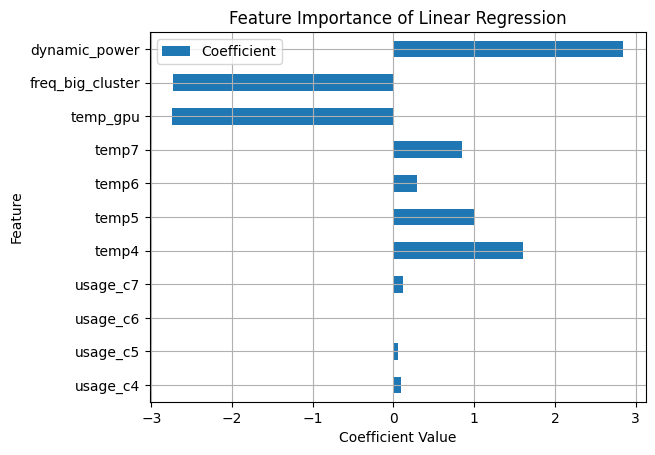

In [27]:
df = pd.DataFrame(linmod[1].coef_, index=train.columns, columns=['Coefficient'])
df.plot(kind='barh')
plt.title("Feature Importance of Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid()

We can see that the top 3 predictors for the power consumption by the big cluster are the dynamic power, the frequency of the big cluster, and the temperature of the GPU. This makes sense, because the cluster power consumption should directly correlate with the dynamic power and frequency, and the gpu temperature is likely affected significantly by the heat output of the cluster as a whole.